# Unit 6: Singuar Value Decomposition

In this unit:
1. SVD
1. Matrix norms
1. Eckart-Young
1. Conditions number
1. Least squares via SVD

$$
A v_1 = \sigma_1 u_1
$$

$$
\vdots
$$

$$
A v_r = \sigma_r u_r
$$

$$
A v_{r+1} = 0
$$

$$
\vdots
$$

$$
A v_n = 0
$$

$$
A V = U \Sigma
$$

$$
A = U \Sigma V^T = \sigma_1 u_1 v_1^T + \ldots + \sigma_r u_r v_r^T
$$

In [46]:
using Random
Random.seed!(0)
A = rand(-2:7,3,5)

3×5 Array{Int64,2}:
 -2   3  1  3   3
  0  -2  6  5  -1
  7  -2  5  2   0

In [51]:
using LinearAlgebra
F = svd(A)

SVD{Float64,Float64,Array{Float64,2}}
U factor:
3×3 Array{Float64,2}:
 0.0092516   0.738282  -0.674429
 0.641909    0.512761   0.570113
 0.766725   -0.438196  -0.469166
singular values:
3-element Array{Float64,1}:
 10.896263981131886
  6.758417563583502
  3.9490787900134343
Vt factor:
3×5 Array{Float64,2}:
  0.490863  -0.256006  0.706144   0.437833   -0.0563637
 -0.672337   0.305651  0.240273   0.577392    0.251847
 -0.490064  -0.563469  0.101397  -0.0281207  -0.65671

In [53]:
U = F.U

3×3 Array{Float64,2}:
 0.0092516   0.738282  -0.674429
 0.641909    0.512761   0.570113
 0.766725   -0.438196  -0.469166

In [54]:
U'U

3×3 Array{Float64,2}:
 1.0          0.0          1.66533e-16
 0.0          1.0          1.38778e-16
 1.66533e-16  1.38778e-16  1.0

In [55]:
V = F.V

5×3 Adjoint{Float64,Array{Float64,2}}:
  0.490863   -0.672337  -0.490064
 -0.256006    0.305651  -0.563469
  0.706144    0.240273   0.101397
  0.437833    0.577392  -0.0281207
 -0.0563637   0.251847  -0.65671

In [56]:
V'*V

3×3 Array{Float64,2}:
  1.0          -1.03154e-16  -2.64279e-16
 -1.03154e-16   1.0          -1.15183e-16
 -2.64279e-16  -1.15183e-16   1.0

In [69]:
S = F.S

3-element Array{Float64,1}:
 10.896263981131886
  6.758417563583502
  3.9490787900134343

In [58]:
svdvals(A)

3-element Array{Float64,1}:
 10.896263981131886
  6.758417563583506
  3.949078790013433

In [59]:
F.Vt

3×5 Array{Float64,2}:
  0.490863  -0.256006  0.706144   0.437833   -0.0563637
 -0.672337   0.305651  0.240273   0.577392    0.251847
 -0.490064  -0.563469  0.101397  -0.0281207  -0.65671

In [62]:
Σ = Diagonal(F.S)

3×3 Diagonal{Float64,Array{Float64,1}}:
 10.8963   ⋅        ⋅ 
   ⋅      6.75842   ⋅ 
   ⋅       ⋅       3.94908

In [63]:
U*Σ*V'

3×5 Array{Float64,2}:
 -2.0           3.0  1.0  3.0   3.0
  2.27583e-15  -2.0  6.0  5.0  -1.0
  7.0          -2.0  5.0  2.0   5.18763e-16

In [64]:
A

3×5 Array{Int64,2}:
 -2   3  1  3   3
  0  -2  6  5  -1
  7  -2  5  2   0

In [72]:
A1 = S[1]*U[:,1]*V[:,1]'

3×5 Array{Float64,2}:
 0.0494829  -0.0258075  0.0711848  0.0441371  -0.00568191
 3.4333     -1.79061    4.93906    3.06239    -0.394231
 4.10089    -2.13879    5.89944    3.65785    -0.470887

In [77]:
A

3×5 Array{Int64,2}:
 -2   3  1  3   3
  0  -2  6  5  -1
  7  -2  5  2   0

In [74]:
A2 = S[1]*U[:,1]*V[:,1]' + S[2]*U[:,2]*V[:,2]'

3×5 Array{Float64,2}:
 -3.30522   1.49927   1.27006  2.9251    1.25094
  1.10334  -0.731394  5.77171  5.06331   0.478532
  6.09202  -3.04398   5.18786  1.9479   -1.21673

In [79]:
F.S

3-element Array{Float64,1}:
 10.896263981131886
  6.758417563583502
  3.9490787900134343

In [80]:
S

3-element Array{Float64,1}:
 10.896263981131886
  6.758417563583502
  3.9490787900134343

In [81]:
svdvals(A)

3-element Array{Float64,1}:
 10.896263981131886
  6.758417563583506
  3.949078790013433

In [75]:
rank(A2)

2

In [89]:
1
2
3

3

In [90]:
A3 = S[1]*U[:,1]*V[:,1]' + S[2]*U[:,2]*V[:,2]' + S[3]*U[:,3]*V[:,3]'

3×5 Array{Float64,2}:
 -2.0           3.0  1.0  3.0   3.0
  2.22045e-15  -2.0  6.0  5.0  -1.0
  7.0          -2.0  5.0  2.0   4.44089e-16

In [91]:
rank(A3)

3

In [82]:
U*Diagonal(S)*V'

3×5 Array{Float64,2}:
 -2.0           3.0  1.0  3.0   3.0
  2.27583e-15  -2.0  6.0  5.0  -1.0
  7.0          -2.0  5.0  2.0   5.18763e-16

In [92]:
norm(A-A1) #matrix norm

7.827606994061976

In [93]:
norm(A-A2)

3.949078790013433

In [94]:
norm(A-A3)

5.315174613145601e-15

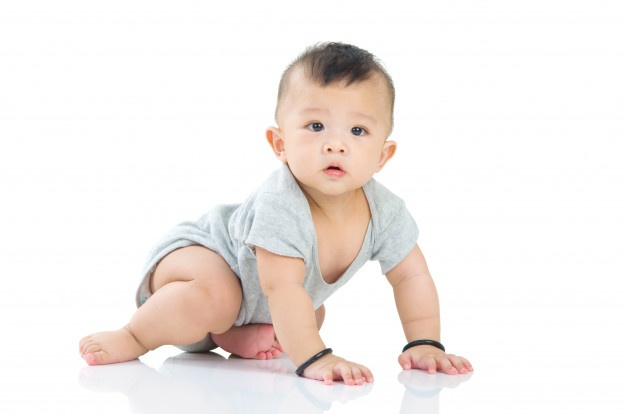

In [100]:
img

In [101]:
typeof(img)

Array{RGB{Normed{UInt8,8}},2}

In [103]:
AnoNoise = red.(img)*1.0 + green.(img)*1.0 +blue.(img)*1.0
rank(AnoNoise)

408

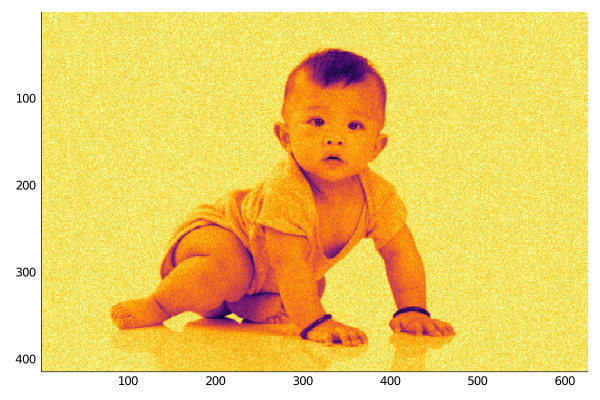

In [105]:
using Images, ImageMagick, LinearAlgebra, Plots

img = load("baby.jpg");
A = red.(img)*1.0 + green.(img)*1.0 +blue.(img)*1.0
A += 0.4*rand(size(A)...)
heatmap(A,yflip=true,legend=false)

In [107]:
size(A)

(414, 626)

In [106]:
rank(A)

414

In [96]:
F = svd(A)

SVD{Float64,Float64,Array{Float64,2}}
U factor:
414×414 Array{Float64,2}:
 -0.0520244  0.00644569  0.083488   …  -0.0233126   0.053328   -0.025787
 -0.0521972  0.00394902  0.0847518     -0.0239261   0.0911226   0.0891633
 -0.052156   0.00607306  0.0867537      0.0129197   0.0998729   0.0582317
 -0.0523767  0.00344759  0.0854733      0.0826097  -0.0437941   0.0076229
 -0.0521441  0.00764091  0.0863647     -0.0201265  -0.0974822  -0.174475
 -0.0522203  0.005917    0.0849756  …  -0.0108093   0.0593496  -0.0573589
 -0.0522436  0.00750766  0.0852357      0.0649648   0.0258285  -0.0953076
 -0.0520889  0.00679246  0.0869009      0.0515667   0.0249895  -0.00346294
 -0.0522097  0.00602617  0.0856643      0.0582747  -0.0522991  -0.0115668
 -0.0523177  0.00749499  0.0876428      0.0797533   0.0356089  -0.0885872
 -0.0521937  0.00466353  0.0860993  …   0.0831392   0.0389959  -0.0112919
 -0.0520005  0.0056103   0.0828862     -0.112563    0.0191021   0.0105925
 -0.0520737  0.00650812  0.0871603     

In [97]:
S

3-element Array{Float64,1}:
 10.896263981131886
  6.758417563583502
  3.9490787900134343

In [108]:
F = svd(A)
U = F.U;
V = F.V; #can also use Vt
S = F.S
Σ = Diagonal(S)
maximum(abs.(A - U*Σ*V'))

2.544631172440859e-13

In [99]:
S

414-element Array{Float64,1}:
 1527.520282229127
  116.48973263538029
   65.72844649018752
   39.0135390033203
   33.39325895983977
   28.878569610432706
   25.95034043589373
   25.296305335052015
   21.144860582857753
   20.31473177408963
   16.939154423465347
   15.90016214660046
   15.478695030121928
    ⋮
    0.7899803215090069
    0.783614150351127
    0.7568472615875449
    0.7506366979002439
    0.7425061576492756
    0.7322456738077717
    0.7121015536541333
    0.6885450021965783
    0.6727186452368387
    0.6593109433799096
    0.6331091339528665
    0.6108290613333868

In [20]:
F.S[1]

1527.6198730947037

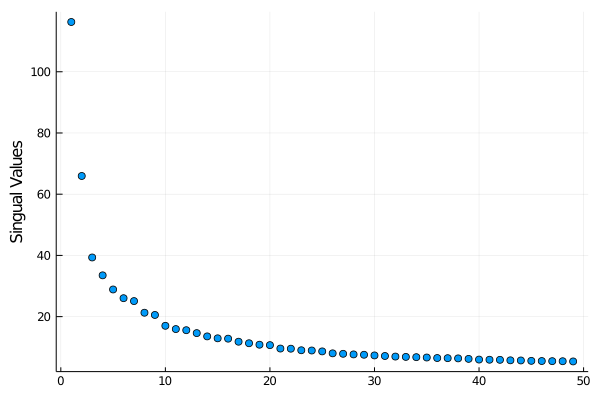

In [110]:
scatter(F.S[2:50],legend=false, ylabel="Singual Values")

In [111]:
approx(k) = sum([S[i]*U[:,i]*V[:,i]' for i in 1:k])

approx (generic function with 1 method)

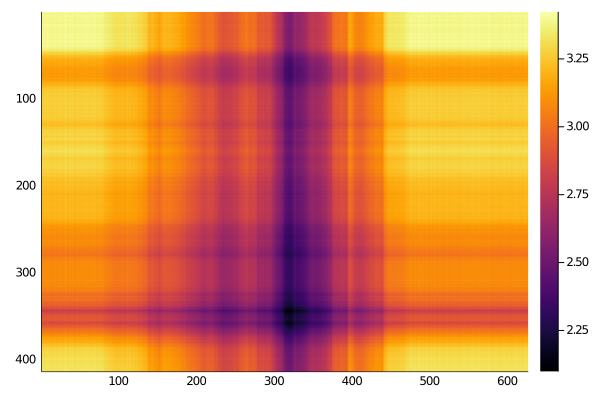

In [112]:
B1 = approx(1);
heatmap(B1,yflip=true)

In [114]:
rank(B2)

2

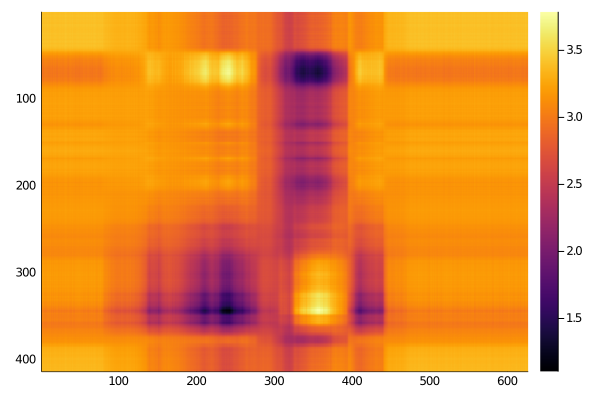

In [113]:
B2 = approx(2);
heatmap(B2,yflip=true)

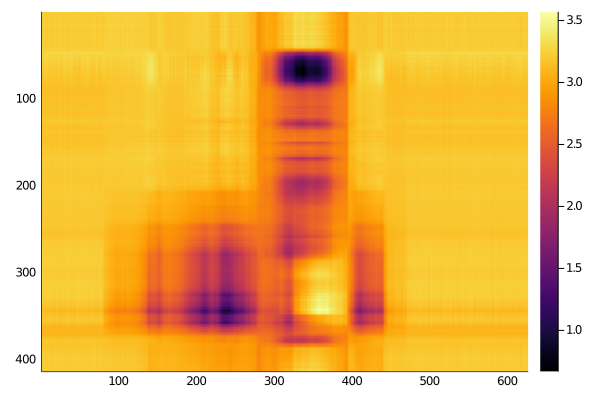

In [115]:
B3 = approx(3);
heatmap(B3,yflip=true)

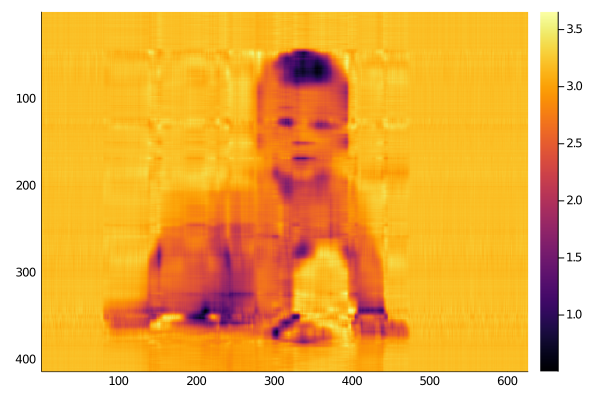

In [116]:
heatmap(approx(10),yflip=true)

In [117]:
cd(@__DIR__)
anim = Animation()
for k in 1:2:19
    print(".")
    heatmap(approx(k),yflip=true,legend=false)
    annotate!(300,200,"rank = $(k)")
    frame(anim)
end
gif(anim,"baby.gif",fps=5);

..........

┌ Info: Saved animation to 
│   fn = /Users/yoninazarathy/Dropbox/MATH7502/MATH7502-2020/CLAWJ/baby.gif
└ @ Plots /Users/yoninazarathy/.juliapro/JuliaPro_v1.4.2-1/packages/Plots/E3MWZ/src/animation.jl:104


Two important matrices:

$$
A^TA
$$

$$
A A^T
$$

In [119]:
eigvals(A'A)

626-element Array{Float64,1}:
    -4.023614052144902e-10
    -1.165725113174784e-10
    -7.210638603957737e-11
    -6.520386104540272e-11
    -5.706092305140295e-11
    -5.181843106384784e-11
    -4.985833329523977e-11
    -4.525388543239351e-11
    -4.126886387085684e-11
    -3.8791337266807177e-11
    -3.741879303429563e-11
    -3.655167479788946e-11
    -3.4527394902012784e-11
     ⋮
   253.8794275025025
   289.1013888375021
   422.191850247037
   452.6921949391069
   628.915037295756
   677.1747085246582
   833.5751453840328
  1121.4648598463914
  1546.5474879358853
  4349.124652233722
 13516.174286035039
     2.3338053240143345e6

In [120]:
size(A'A)

(626, 626)

In [118]:
eigVals1 = sort(eigvals(A'A),rev=true)

626-element Array{Float64,1}:
     2.3338053240143345e6
 13516.174286035039
  4349.124652233722
  1546.5474879358853
  1121.4648598463914
   833.5751453840328
   677.1747085246582
   628.915037295756
   452.6921949391069
   422.191850247037
   289.1013888375021
   253.8794275025025
   242.22830459450088
     ⋮
    -3.655167479788946e-11
    -3.741879303429563e-11
    -3.8791337266807177e-11
    -4.126886387085684e-11
    -4.525388543239351e-11
    -4.985833329523977e-11
    -5.181843106384784e-11
    -5.706092305140295e-11
    -6.520386104540272e-11
    -7.210638603957737e-11
    -1.165725113174784e-10
    -4.023614052144902e-10

In [121]:
size(A*A')

(414, 414)

In [32]:
eigVals2 = sort(eigvals(A*A'),rev=true)

414-element Array{Float64,1}:
     2.3336224766738815e6
 13525.42302182173
  4329.274220843487
  1536.3502441164678
  1114.828189467008
   831.9959373175544
   679.4578004545926
   648.2349559110871
   453.0533591818199
   425.80351173985764
   284.5443970016237
   258.84422377844476
   245.00778763371375
     ⋮
     0.6074550819800145
     0.6046718613589778
     0.5880844456485871
     0.5779087280972477
     0.55368361698055
     0.5418541322267542
     0.5124548791170417
     0.4983524771387545
     0.460387338093251
     0.40942203107430775
     0.38289969784742145
     0.3705482889741597

In [122]:
eigVals1c = filter((x)->abs(x) > 1e-9 ,eigVals1) #filter out the zero eigenvalues (A'A)

414-element Array{Float64,1}:
     2.3338053240143345e6
 13516.174286035039
  4349.124652233722
  1546.5474879358853
  1121.4648598463914
   833.5751453840328
   677.1747085246582
   628.915037295756
   452.6921949391069
   422.191850247037
   289.1013888375021
   253.8794275025025
   242.22830459450088
     ⋮
     0.6362892361388378
     0.6156600550739398
     0.588203349031255
     0.5564152796682429
     0.5401708777784768
     0.5192453384204313
     0.49406995868214526
     0.4775780083608754
     0.43502456957349556
     0.42759705248497787
     0.3879595167411683
     0.3438946864299914

In [40]:
norm(eigVals1c - eigVals2)

4.895934114710006e-10

In [123]:
sqrt.(eigVals1c)

414-element Array{Float64,1}:
 1527.6797190557759
  116.25908259587737
   65.9478934632011
   39.32616797929701
   33.488279439923325
   28.87170146326733
   26.022580742975094
   25.07817850833182
   21.276564453386428
   20.547307615525618
   17.002981763135022
   15.933594305821348
   15.563685443830483
    ⋮
    0.7976774010455843
    0.7846400799563708
    0.7669441629162158
    0.74593249002054
    0.7349631812400379
    0.7205868014475642
    0.7029011016367418
    0.6910701906180554
    0.6595639237962425
    0.6539090552094977
    0.6228639632706072
    0.5864253459989527

In [124]:
svdvals(A)

414-element Array{Float64,1}:
 1527.6797190557752
  116.25908259587744
   65.94789346320091
   39.32616797929699
   33.488279439923176
   28.871701463267154
   26.022580742975045
   25.07817850833189
   21.276564453386353
   20.54730761552562
   17.002981763134905
   15.933594305821236
   15.56368544383074
    ⋮
    0.7976774010479372
    0.7846400799581403
    0.7669441629149851
    0.7459324900167815
    0.7349631812398058
    0.7205868014490121
    0.7029011016353809
    0.6910701906214175
    0.6595639238023676
    0.6539090552088304
    0.6228639632737881
    0.586425346010317